Research "Identifying User Profiles"
-----------------------------------------------------------------
---------------------------------------------------------------------

**Additional materials**:

[Presentation](https://drive.google.com/file/d/1zhbJ0DswQWU2yZ-v2bla0sR-Yj2DznOH/view?usp=drive_link)

[Dashboard](https://public.tableau.com/app/profile/anna.shabanova/viz/Ecom-/-)


**Research objective:** perform customer segmentation based on their consumption profile

It is important for the client to:
- divide users into segments
- get recommendations on how to work with each segment
- find an individual approach to each category of users

**Data**:
- `date` - order date
- `customer_id` - customer identifier
- `order_id` - order identifier
- `product` - name of the product

**Ход исследования:**
1. [Obtaining general information about the data](#section1)
2. [Data preprocessing](#section2)
    1. data type
    2. duplicates
    3. data gaps
3. [Data Analysis](#sectoin3)
    1. abnormal values
    2. data overview
    3. month, day of the month, day of week, hour - new columns
    4. Sales analysis
        1. revenue
        2. revenue by month
        3. revenue by the day of the month
        4. revenue by the day of the week
        6. revenue by hour
        7. order total
        8. revenue by customer
4. [Products catagories](#section4)
    1. define product categories
    2. sales by roduct categories
    3. Seasonality of goods
5. [Customer segmentation](#section5)
    1. rfm-analysis
    2. distribution of customers by segments
    3. files for each segment
6. [Statistical tests](#section6)
    1. test 1
    2. test 2
7. [Overall conclusion](#section7)

<a id=' section1'></a>
# Obtaining general information about the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt
from datetime import datetime
import numpy as np
from collections import Counter
from scipy import stats as st

In [2]:
data = pd.read_csv('ecom_dataset_upd.csv')
df = data.copy()
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


<a id=' section2'></a>
#  Data preprocessing
##  data type

- the data in the `date` column is in `int64` format, it is necessary to convert this column to `datetime` format
- make the contents of the product column lower case

The data type in the other columns is correct.

In [4]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [5]:
df['date'].unique()

array(['2018-10-01T00:00:00.000000000', '2018-10-01T08:00:00.000000000',
       '2018-10-01T09:00:00.000000000', ...,
       '2020-01-31T02:00:00.000000000', '2020-01-31T12:00:00.000000000',
       '2020-01-31T15:00:00.000000000'], dtype='datetime64[ns]')

In [6]:
df['product'] = df['product'].str.lower()
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0


## duplicates

### full duplicates

Let's check if dataset has any full duplicates

In [7]:
print('Amount of full duplicates: {}'\
      .format(df.duplicated().sum()))

Amount of full duplicates: 0


### fuzzy duplicates

let's check for duplicates in all key columns excluding the column `date`

In [8]:
df.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']).sum()

1864

In [9]:
duplicated = df[df.duplicated(['customer_id', 'order_id', 'product', 'quantity', 'price'])]
duplicated = duplicated.sort_values(by=['order_id', 'product'])
duplicated.head(10)

,date,customer_id,order_id,product,quantity,price
376,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0
509,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0
588,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0
758,2018-11-10 17:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0
816,2018-11-15 15:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0
827,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни лаванды в кассете по ...,1,315.0
377,2018-10-23 13:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207.0
510,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207.0
589,2018-11-02 14:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207.0
759,2018-11-10 17:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,рассада зелени для кухни розмарина в кассете п...,1,207.0


In [10]:
print('Amount of duplicates in dataset {}, which is {}% of data'\
     .format(df.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']).sum(),
             round(df.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price']).sum() / \
                  len(df) * 100, 2)))

Amount of duplicates in dataset 1864, which is 24.94% of data


There are many rows in the dataset with absolutely identical orders, where only the order date differs.
It is possible that an error occurred when uploading the dataset and some of the orders were duplicated. Let's assume that the 1st order is correct (i.e. the first date) and delete the duplicates, leaving only the original orders in the dataset.
Let's check how many rows were deleted from the dataset.

In [11]:
df = df.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'], \
                        keep='first', ignore_index=False)
len(data) - len(df)

1864

now let's check if the conditions are met:
- only one customer_id corresponds to certain order_id
- only one order_id corresponds to certain order date

In [12]:
double_id = df.groupby('order_id').agg({'customer_id': 'nunique'}).query('customer_id > 1')
len(double_id)

29

In [13]:
df.query('order_id in @double_id.index').sort_values(by=['order_id', 'date']).head(5)

,date,customer_id,order_id,product,quantity,price
5518,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,однолетнее растение петуния махровая в кассете...,2,82.0
5519,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,однолетнее растение петуния простая в кассете ...,1,82.0
5520,2019-06-21 22:00:00,4e861452-b692-48dc-b756-99a130b7a70a,14872,петуния махровая рассада однолетних цветов в к...,1,128.0
5549,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,однолетнее растение петуния махровая в кассете...,2,82.0
5550,2019-06-24 09:00:00,9897ccd6-9441-4886-b709-b06361fabf6c,14872,однолетнее растение петуния простая в кассете ...,1,82.0


In [14]:
double_date = df.groupby('order_id').agg({'date': 'nunique'}).query('date > 1')
len(double_date)

51

Let's have a look at those rows

In [15]:
df.query('order_id in @double_date.index').sort_values(by=['order_id', 'date']).head()

,date,customer_id,order_id,product,quantity,price
482,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,многолетнее растение душица-орегано розовый об...,1,89.0
483,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,многолетнее растение тимьян-чабрец розовый объ...,1,89.0
484,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,пеларгония зональная диам. 12 см белая полумах...,1,188.0
485,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,пеларгония зональная диам. 12 см розовая с мал...,1,188.0
486,2018-10-28 08:00:00,3ee43256-af7d-4036-90d4-eeefa1afc767,14500,пеларгония зональная диам. 12 см сиреневый пол...,1,188.0


In [16]:
df_length = len(df)
df_length

5610

- for rows where one `order_id` corresponds to more than one date, we will create a pivot table where we will determine the minimum order date for each order.
- select the rows with more than one unique date
- save the order numbers and minimum dates into lists
- filter the initial dataset using the lists

Then check how many rows have been removed.

In [17]:
double_date_pivot = pd.pivot_table(
    df,
    index=['order_id'],
    values=['date'],
    aggfunc=[pd.Series.nunique, min]).reset_index()

double_date_pivot.columns = ['order_id', 'unique', 'min_date']

double_date_pivot = double_date_pivot.query('unique > 1')

double_date_order_list = double_date_pivot['order_id'].values.tolist()
double_date_min_list = double_date_pivot['min_date'].tolist()

df = df.query('(order_id in @double_date_order_list and date not in @double_date_min_list) \
    or order_id not in @double_date_order_list')

In [18]:
print('Deleted rows')
print()
print(f'Before: {df_length}')
print(f'After: {len(df)}')
print(f'Deleted: {df_length - len(df)}')
print(f'% deleted: {(1 - (len(df)/df_length)):.2%}')

Deleted rows

Before: 5610
After: 5520
Deleted: 90
% deleted: 1.60%


We have a total of 29 rows where one order number corresponds to more than one user id. We will delete these rows from the dataset.

In [19]:
df = df.query('order_id not in @double_id.index')
len(df)

5484

## Data Gaps

In [20]:
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

There are no data gaps in our dataset

<a id=' section3'></a>
# Data Analysis

## Abnormal Values

### `date`

In [21]:
print('Earliest date: {}'.format(df['date'].min()))
print('Latest date: {}'.format(df['date'].max()))

Earliest date: 2018-10-01 00:00:00
Latest date: 2020-01-31 15:00:00


We have data from October 2018 through January 31, 2020. We can look at sales trends for 2019, as well as year-to-year changes in months like October, November, December, and January.

### `quantity`

In [22]:
data['quantity'].describe()

count    7474.000000
mean        2.362858
std        14.500497
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1000.000000
Name: quantity, dtype: float64

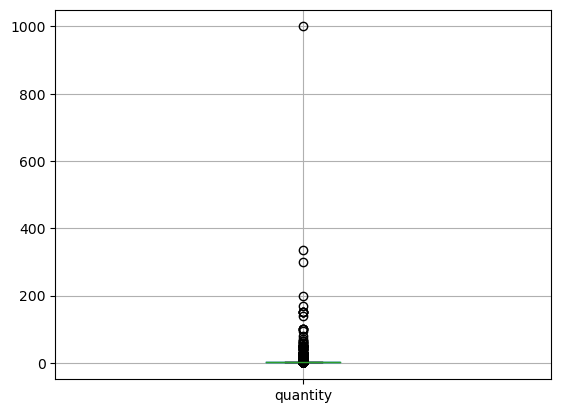

In [23]:
data.boxplot(column=['quantity'])
plt.show()

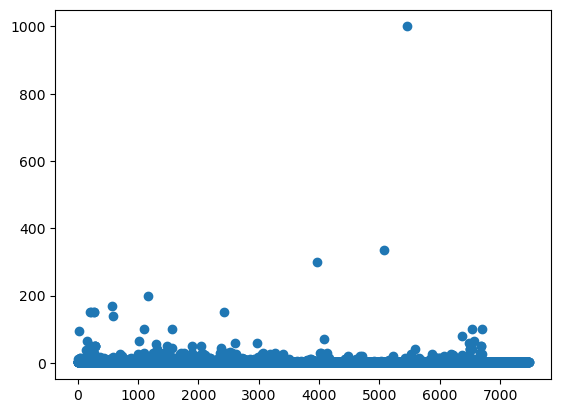

In [24]:
plt.scatter(data.index, data['quantity'])
plt.show()

let's look at the rows where the number of items exceeds 100

In [25]:
data.query('quantity > 100')

,date,customer_id,order_id,product,quantity,price
211,2018101114,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0
212,2018101114,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0
266,2018101608,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0
267,2018101608,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0
568,2018110108,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0
586,2018110211,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59.0
1158,2018121014,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
2431,2019032310,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20.0
3961,2019052021,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
5071,2019061107,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0


The order with 1000 plungers is a test order that you forgot to delete from the dataset. Let's delete this line. There are few rows with values greater than 100, such orders are quite possible. Let's leave them in the dataset.

In [26]:
df = df.query('quantity != 1000')
len(df)

5483

### `price`

In [27]:
data['price'].describe()

count     7474.000000
mean       478.737501
std        901.615895
min          9.000000
25%         97.000000
50%        135.000000
75%        439.000000
max      14917.000000
Name: price, dtype: float64

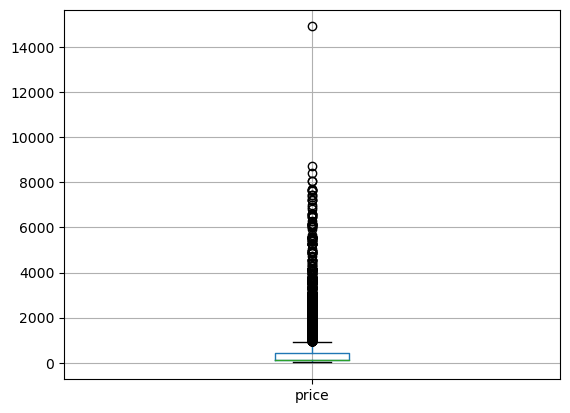

In [28]:
data.boxplot(column=['price'])
plt.show()

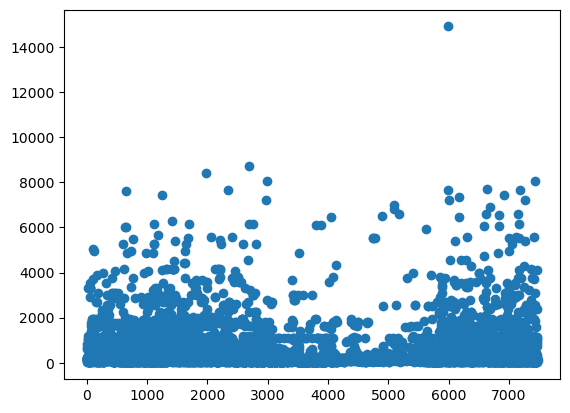

In [29]:
plt.scatter(data.index, data['price'])
plt.show()

In [30]:
data.query('price > 8000')

,date,customer_id,order_id,product,quantity,price
1981,2019022410,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,Сумка-тележка хозяйственная Andersen Alu Star ...,1,8437.0
2697,2019040519,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,Сумка-тележка хозяйственная Andersen Royal Sho...,1,8737.0
2997,2019042116,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077.0
5992,2019072917,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917.0
7436,2020012619,04416514-5346-4f90-93e3-fb7365e2ee8c,109758,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077.0


This is correct price for the item eifheit 85210. Column `price` doesn't have abnormal values.

## data overview

Let's have a look at key velues after we finished data pre-processing.

In [31]:
print('Unique users: {}'.format(df['customer_id'].nunique()))
print('Unique product names: {}'.format(df['product'].nunique()))
print('unique orders: {}'.format(df['order_id'].nunique()))

Unique users: 2412
Unique product names: 2327
unique orders: 3491


In [32]:
len(df)

5483

## Month, day of the month, day of week, hour - new columns

We will create new columns:
- `month` - order date, rounded to month
- `dom` - day of the month
- `dow` - day of the week
- `hour` - hour when the order was placed

In [33]:
df['dom'] = df['date'].dt.day
df['dow'] = df['date'].dt.dayofweek
df['hour'] = df['date'].dt.hour
df.head()

,date,customer_id,order_id,product,quantity,price,dom,dow,hour
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,1,0,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,1,0,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,1,0,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,1,0,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,1,0,0


In [34]:
df['month'] = df['date'].dt.to_period('M')
df['month'] = df['month'].dt.to_timestamp()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5483 entries, 0 to 7473
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5483 non-null   datetime64[ns]
 1   customer_id  5483 non-null   object        
 2   order_id     5483 non-null   int64         
 3   product      5483 non-null   object        
 4   quantity     5483 non-null   int64         
 5   price        5483 non-null   float64       
 6   dom          5483 non-null   int64         
 7   dow          5483 non-null   int64         
 8   hour         5483 non-null   int64         
 9   month        5483 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(5), object(2)
memory usage: 471.2+ KB


In [35]:
df['month'].unique()

array(['2018-10-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

## Sales Analysis

### revenue

- create a new column `line_total`, where we will keep results of multiplying the values of columns `quantity` and `price`.
- calculate the total revenue for the observed period and the average revenue for the month

In [36]:
df['line_total'] = df['quantity'] * df['price']
df.head(2)

,date,customer_id,order_id,product,quantity,price,dom,dow,hour,month,line_total
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,1,0,0,2018-10-01,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,1,0,0,2018-10-01,194.0


In [37]:
print('Revenue for the entire period under review: {}'.format(round(df['line_total'].sum())))
print('Average monthly revenue: {}'.format(round(df['line_total'].sum() / df['month'].nunique())))

Revenue for the entire period under review: 3908324
Average monthly revenue: 244270


Let's create variables where we will calculate:
- sales and orders by month
- sales and orders by the day of the month
- sales and orders by the hour
- sales and orders by the day of the week

And then vizualize each parametr.

### Monthly Sales

#### monthly revenue

let's calculate monthly revenue

In [38]:
monthly_sales = df.groupby('month').agg(month_ttl = ('line_total', 'sum')).reset_index()
monthly_sales['month_ttl'] = round(monthly_sales['month_ttl'])
monthly_sales

,month,month_ttl
0,2018-10-01,349752.0
1,2018-11-01,359348.0
2,2018-12-01,345473.0
3,2019-01-01,227122.0
4,2019-02-01,303048.0
5,2019-03-01,251056.0
6,2019-04-01,312886.0
7,2019-05-01,233843.0
8,2019-06-01,228176.0
9,2019-07-01,234549.0


#### amount of orders per month

In [39]:
print('Total amount of orders: {}, average amount of orders per month: {}'\
      .format(df['order_id'].nunique(),
              round(df['order_id'].nunique() / df['month'].nunique())))

Total amount of orders: 3491, average amount of orders per month: 218


In [40]:
orders_per_month = df.groupby('month')['order_id'].nunique().reset_index()
orders_per_month

,month,order_id
0,2018-10-01,238
1,2018-11-01,204
2,2018-12-01,278
3,2019-01-01,162
4,2019-02-01,286
5,2019-03-01,243
6,2019-04-01,263
7,2019-05-01,178
8,2019-06-01,157
9,2019-07-01,198


### Sales by day of the month

#### revenue by day of the month

In [41]:
sales_per_dom = df.groupby('dom')['line_total'].sum().reset_index()
sales_per_dom['line_total'] = round(sales_per_dom['line_total'])
sales_per_dom

,dom,line_total
0,1,100736.0
1,2,118114.0
2,3,92236.0
3,4,205719.0
4,5,167890.0
5,6,138596.0
6,7,141515.0
7,8,115096.0
8,9,98249.0
9,10,125196.0


#### amount of orders by day of the month

In [42]:
orders_per_dom = df.groupby('dom')['order_id'].nunique().reset_index()
orders_per_dom

,dom,order_id
0,1,117
1,2,105
2,3,108
3,4,159
4,5,139
5,6,106
6,7,110
7,8,100
8,9,95
9,10,129


### Sales by the hour

#### revenue by the hour

In [43]:
sales_per_hr = df.groupby('hour')['line_total'].sum().reset_index()
sales_per_hr['line_total'] = round(sales_per_hr['line_total'])
sales_per_hr

,hour,line_total
0,0,48074.0
1,1,27617.0
2,2,27366.0
3,3,11056.0
4,4,14983.0
5,5,22310.0
6,6,48244.0
7,7,151304.0
8,8,169138.0
9,9,236203.0


In [44]:
orders_per_hr = df.groupby('hour')['order_id'].nunique().reset_index()
orders_per_hr

,hour,order_id
0,0,60
1,1,31
2,2,22
3,3,10
4,4,19
5,5,22
6,6,32
7,7,73
8,8,147
9,9,207


### Function for line plots

In [100]:
def create_line_graph(data_frame, x_column, y_column):
    fig = px.line(data_frame, x=x_column, y=y_column, markers=True)
    return fig

def plot_line_graphs(subplot_titles, *graph_data):
    num_graphs = len(graph_data)
    figs = make_subplots(rows=num_graphs, cols=1, subplot_titles=subplot_titles, vertical_spacing=0.1)
    
    for idx, graph in enumerate(graph_data, start=1):
        figs.add_trace(graph.data[0], row=idx, col=1)
    
    figs.update_layout(height=750, width=900)
    figs.show('png')

### Vizualizing sales analysis

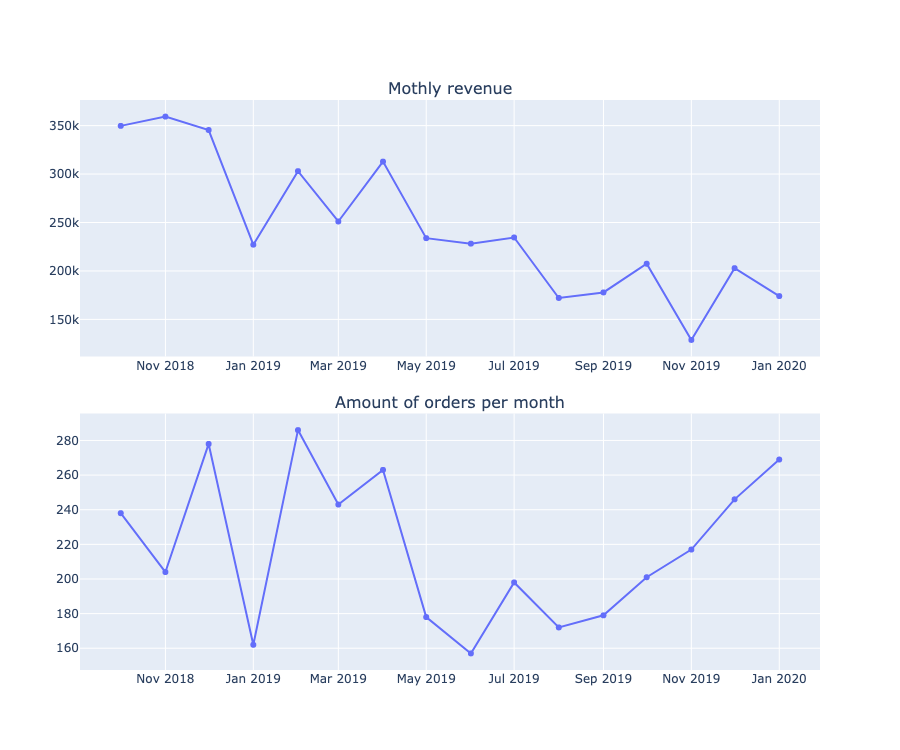

In [101]:
fig_m_sales = create_line_graph(monthly_sales, x_column='month', y_column='month_ttl')
fig_orders_m = create_line_graph(orders_per_month, x_column='month', y_column='order_id')
fig_m_sales.update_traces(hovertemplate='month: %{x}<br>sales: %{y}')
fig_orders_m.update_traces(hovertemplate='month: %{x}<br>orders: %{y}')

plot_line_graphs(['Mothly revenue', 'Amount of orders per month'],
                 fig_m_sales, fig_orders_m)

[monthly sales graph](http://localhost:8889/files/Yandex.Practicum/projects%20for%20GitHub/13_Final_ecom_customer%20segmentation/monthly%20sales.56.17.png)

**Sales by month**. There is a general downward trend in sales. Starting from December 2018, sales went downwards and the downward trend continues throughout the entire period.

In [47]:
dec_18 = monthly_sales.loc[2, 'month_ttl']
dec_19 = monthly_sales.loc[14, 'month_ttl']
jan_19 = monthly_sales.loc[3, 'month_ttl']
jan_20 = monthly_sales.loc[15, 'month_ttl']

print(
    'December 2019 sales were {} rubles less than December 2018; sales were down {}%.'.
    format(
        dec_18 - dec_19,
        round((dec_18 - dec_19) / dec_18 * 100)))
print()
print(
    'January 2020 sales were {} rubles less than January 2019; sales were down {}%'.
    format(
        jan_19 - jan_20,
        round((jan_19 - jan_20) / jan_19 * 100)))

December 2019 sales were 142588.0 rubles less than December 2018; sales were down 41%.

January 2020 sales were 53086.0 rubles less than January 2019; sales were down 23%


**Number of orders by month** The graph is quite uneven, which is normal for retail. The number of sales drops expectedly in January 2019. But comes back to normal in February. In May, it drops to the January level and then starts to rise again.
Revenue drops strongly in the second half and end of 2019. However, the order quantity graph shows an increase. Order quantity peaks again in January 2020 (December 2018 and February 2019 levels).
It seems that the store lost customers who placed more expensive orders, or the customers' buying behavior changed and they started buying cheaper products.

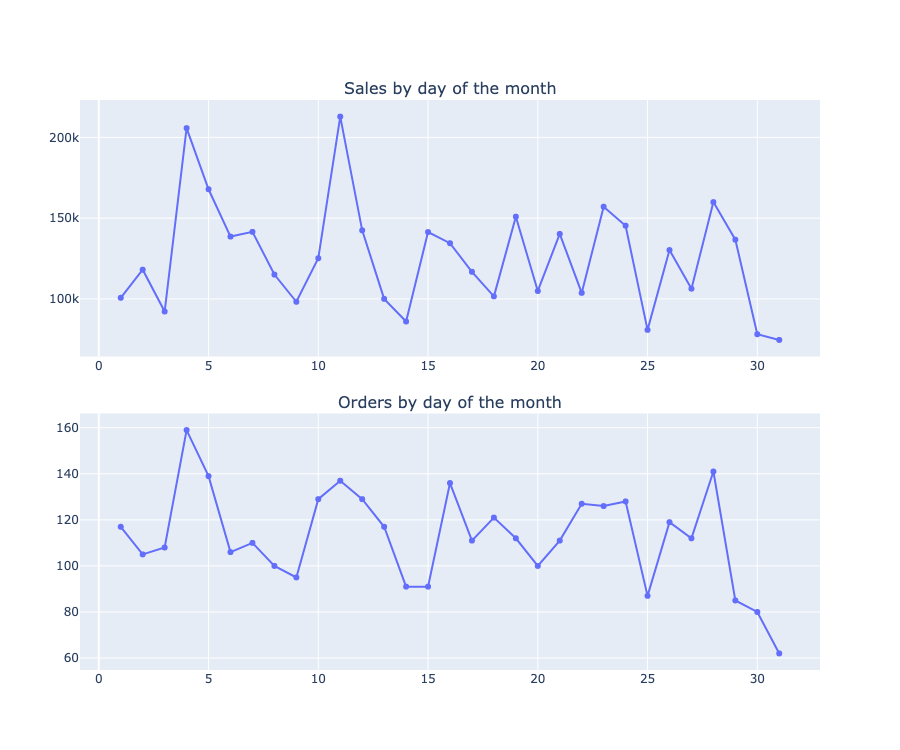

In [102]:
fig_dm_sales = create_line_graph(sales_per_dom, x_column='dom', y_column='line_total')
fig_orders_dm = create_line_graph(orders_per_dom, x_column='dom', y_column='order_id')

fig_dm_sales.update_traces(hovertemplate='day of the month: %{x}<br>sales: %{y}')
fig_orders_dm.update_traces(hovertemplate='day of the month: %{x}<br>orders: %{y}')

plot_line_graphs(['Sales by day of the month', 'Orders by day of the month'],
                 fig_dm_sales, fig_orders_dm)

The graphs are quite synchronized. The dynamics of the number of orders repeats the dynamics of revenue. The most profitable days of the month are the 4th and 11th of the month. The first two weeks of the month. Then sales go down.

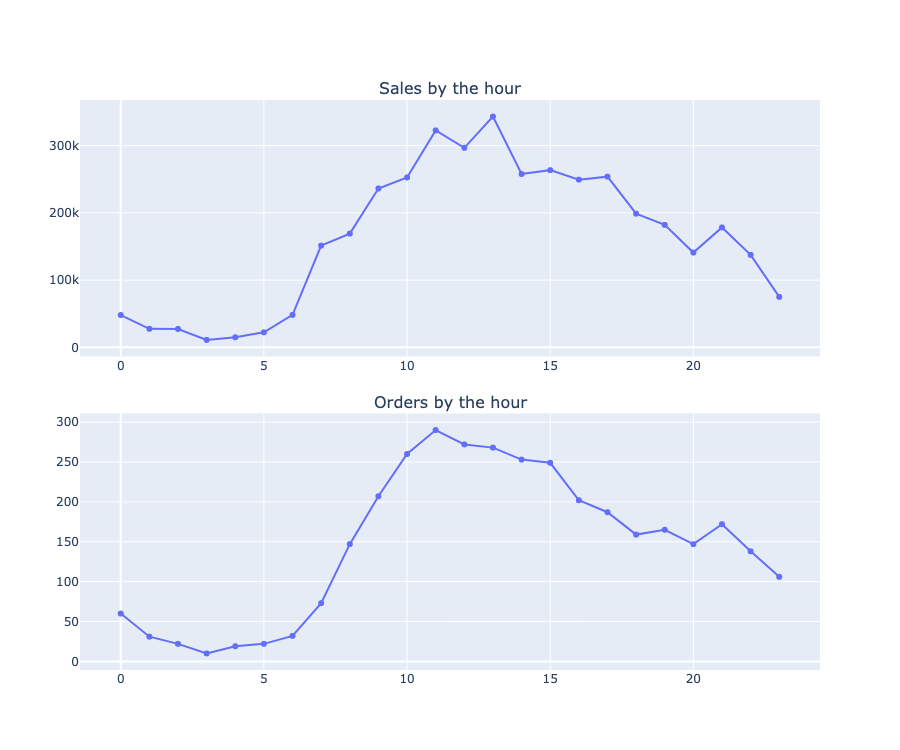

In [103]:
fig_sh_sales = create_line_graph(sales_per_hr, x_column='hour', y_column='line_total')
fig_orders_sh = create_line_graph(orders_per_hr, x_column='hour', y_column='order_id')

fig_sh_sales.update_traces(hovertemplate='hour: %{x}<br>sales: %{y}')
fig_orders_sh.update_traces(hovertemplate='hour: %{x}<br>orders: %{y}')

plot_line_graphs(['Sales by the hour', 'Orders by the hour'],
                 fig_sh_sales, fig_orders_sh)

The graphs are synchronized. The peak of sales is at 11 o'clock in the afternoon. The most expensive orders were made at 13 o'clock.

### Sales by the day of the week

#### revenue by the day of the week

In [50]:
sales_per_dow = df.groupby('dow')['line_total'].sum().reset_index()
sales_per_dow

,dow,line_total
0,0,641494.666667
1,1,754628.500000
2,2,571985.166667
3,3,623721.833333
4,4,576293.750000
5,5,318562.000000
6,6,421638.500000


In [51]:
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

sales_per_dow['dow'] = sales_per_dow['dow'].replace(day_names)
sales_per_dow['line_total'] = round(sales_per_dow['line_total'])
sales_per_dow

,dow,line_total
0,Monday,641495.0
1,Tuesday,754628.0
2,Wednesday,571985.0
3,Thursday,623722.0
4,Friday,576294.0
5,Saturday,318562.0
6,Sunday,421638.0


#### amount of orders by the day of the week

In [52]:
orders_per_week = df.groupby('dow')['order_id'].nunique().reset_index()
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

orders_per_week['dow'] = orders_per_week['dow'].replace(day_names)
orders_per_week

,dow,order_id
0,Monday,576
1,Tuesday,593
2,Wednesday,533
3,Thursday,545
4,Friday,456
5,Saturday,345
6,Sunday,443


#### vizualizing sales by the day of the week

In [53]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


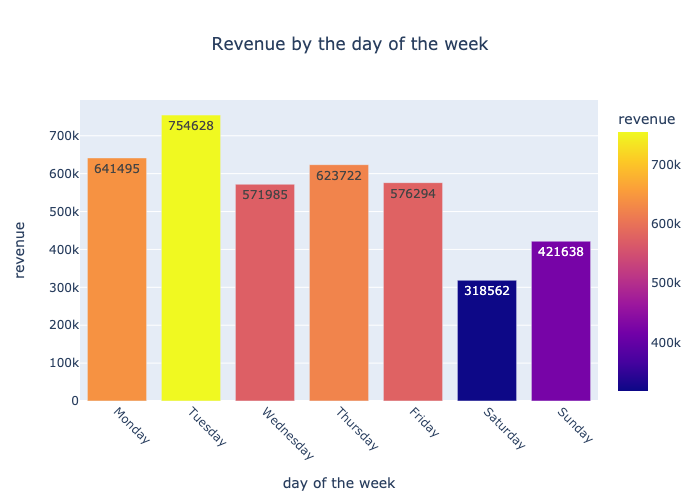

In [54]:
fig_sales_dow = px.bar(
    sales_per_dow,
    x='dow',
    y='line_total',
    color='line_total',
    title='Revenue by the day of the week',
    labels={'dow': 'day of the week', 'line_total': 'revenue'},
    text=sales_per_dow['line_total'])
    
fig_sales_dow.update_layout(title_x=0.5, xaxis_tickangle=45)
fig_sales_dow.show('png')

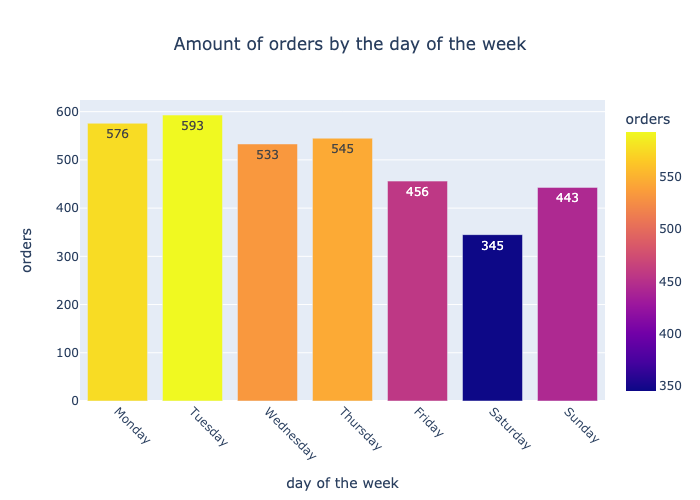

In [99]:
fig_week = px.bar(
    orders_per_week,
    x='dow',
    y='order_id',
    color='order_id',
    title='Amount of orders by the day of the week',
    labels={'dow': 'day of the week', 'order_id': 'orders'},
    text=orders_per_week['order_id'])

fig_week.update_layout(
    title_x=0.5,
    xaxis_tickangle=45)

fig_week.show('png')

Both graphs repeat the same dynamics: the least number of orders is received on weekends (Friday through Sunday), Saturday has the smallest number of orders. Tuesday is the day with the most orders, so it is the day with the highest sales.

### Order amount

Analyze the amount of orders. Find out the minimum, maximum, average check. Visualize the distribution.

To do this, create a new column `order_total`, where we will calculate the order amount: summarize all values of the `line_total` column for rows with the same `order_id`.

In [56]:
df['order_total'] = df.groupby('order_id')['line_total'].transform(sum)
df.head()

,date,customer_id,order_id,product,quantity,price,dom,dow,hour,month,line_total,order_total
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,1,0,0,2018-10-01,142.0,1037.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,1,0,0,2018-10-01,194.0,1037.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,1,0,0,2018-10-01,112.0,1037.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,1,0,0,2018-10-01,179.0,1037.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,1,0,0,2018-10-01,112.0,1037.0


In [57]:
df['order_total'].describe()

count     5483.000000
mean      1428.926758
std       2429.810086
min          9.000000
25%        374.000000
50%        877.000000
75%       1762.000000
max      49432.000000
Name: order_total, dtype: float64

In [58]:
df = df.reset_index(drop=True)

Let's create a variable `bill`, where we will calculate the amount of each order. Then let's make a visualization.

In [59]:
bill = df.groupby('order_id')['line_total'].sum().reset_index()
bill = bill.rename(columns={'line_total': 'order_total'})
bill

,order_id,order_total
0,12624,375.0
1,13547,684.0
2,14480,359.0
3,14481,600.0
4,14482,376.0
...,...,...
3486,112722,450.0
3487,112732,90.0
3488,112767,38.0
3489,112779,172.0


In [60]:
bill['order_total'].describe()

count     3491.000000
mean      1119.542944
std       2085.489108
min          9.000000
25%        193.500000
50%        577.000000
75%       1237.500000
max      49432.000000
Name: order_total, dtype: float64

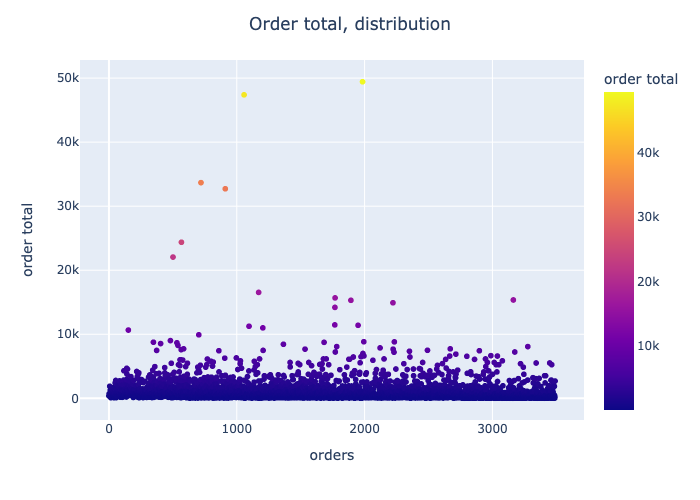

In [104]:
fig_bill = px.scatter(bill, x=bill.index, y='order_total', color='order_total', 
                      labels={'index': 'order',
                              'order_total': 'order total'})

fig_bill.update_layout(
    title='Order total, distribution',
    title_x=0.5,
    xaxis_title='orders',
    yaxis_title='order total'
)

fig_bill.update_traces(name='order total')

fig_bill.show('png')

In [62]:
print('Min order total: {}, max order total: {}, median order total: {}'
      .format(bill['order_total'].min(),
              bill['order_total'].max(),
              bill['order_total'].median()))

Min order total: 9.0, max order total: 49432.0, median order total: 577.0


There are isolated cases where the order amount exceeds 30000 rubles; a few orders with the amount from 10000 to 30000 thousand rubles. The bulk of orders are made for the sum of 9 to 5000 rubles.

### Revenue by cistomer

In [63]:
client = df.groupby('customer_id')['line_total'].sum().reset_index()
client.head()

,customer_id,line_total
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.0


In [64]:
client['line_total'].describe()

count      2412.000000
mean       1620.366674
std        4340.125545
min          15.000000
25%         389.000000
50%         831.000000
75%        1798.000000
max      159508.000000
Name: line_total, dtype: float64

We can see a huge variation in how much different users spend in the store.

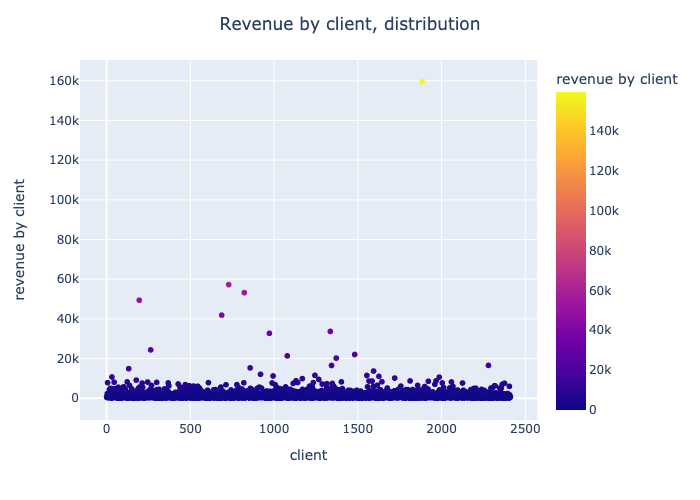

In [105]:
fig_client = px.scatter(client, x=client.index, y='line_total', color='line_total',
                        labels={'index': 'client',
                                'line_total': 'revenue by client'
                               }
                       )
fig_client.update_layout(
    title='Revenue by client, distribution',
    title_x=0.5,
)


fig_bill.update_layout(
    title='Order total, distribution',
    title_x=0.5,
    xaxis_title='orders',
    yaxis_title='order total'
)

fig_client.show('png')

In [66]:
client.sort_values(by='line_total', ascending=False).head(15)

,customer_id,line_total
1884,c971fb21-d54c-4134-938f-16b62ee86d3b,159508.0
729,4d93d3f6-8b24-403b-a74b-f5173e40d7db,57278.0
822,58a4c3cc-504f-43ea-a74a-bae19e665552,53232.0
195,146cd9bf-a95c-4afb-915b-5f6684b17444,49432.0
687,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,41900.0
1336,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,33680.0
972,6987e6d6-a63a-4ce2-a2d0-f424092d235e,32718.0
263,1b2764ad-9151-4051-a46a-9b01b62e6335,24370.0
1481,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,22056.0
1079,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,21361.0


There is one client who spent more than 150 thousand roubles in the store. There are several clients who bought from 57 to 20 thousand rubles. The vast majority of clients spent between 15 rubles and 10,000 rubles.

In [67]:
print('Min revenue by client: {}, max revenue by client: {}, median revenue by client: {}'
      .format(client['line_total'].min(),
              client['line_total'].max(),
              client['line_total'].median()))

Min revenue by client: 15.0, max revenue by client: 159508.0, median revenue by client: 831.0


<a id=' section4'></a>
# Product categories

Let's categorize the goods into categories. To do this:
- Create a `first_two_words` column where we store the first two words from the product description. Since the first two words in the product description have semantic load
- Let's calculate which words in the `first_two_words` column are used most often. Based on these words, we will define product categories. 
- create a dictionary for each category
- categorize the goods

In [68]:
df['first_two_words'] = df['product'].apply(lambda x: ' '.join(x.split()[:2]))
df.head()

,date,customer_id,order_id,product,quantity,price,dom,dow,hour,month,line_total,order_total,first_two_words
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,1,0,0,2018-10-01,142.0,1037.0,комнатное растение
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,1,0,0,2018-10-01,194.0,1037.0,комнатное растение
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,1,0,0,2018-10-01,112.0,1037.0,радермахера d-12
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,1,0,0,2018-10-01,179.0,1037.0,хризолидокарпус лутесценс
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,1,0,0,2018-10-01,112.0,1037.0,циперус зумула


In [69]:
# cоздание словаря, где будут храниться ключевые слова для сортировки товаров по группам
def categorize_product(description):
    plants_keywords = ['рассад', 'растение ', 'пеларгон', 'помидор', 'петуния', 'огурец', 'патиссон', 'калибрахоа', \
                       'бакопа', 'тагетис', 'капуст', 'садовая', 'вербена', 'лобелия', 'эвкалипт', 'декабрист'\
                      'фуксия', 'примула', 'базилик ', 'роза ', 'фуксия ', 'мята ', 'флокс ', 'фиалка ',\
                      'декабрист ', 'цикламен ', 'микс ', 'антуриум', 'пуансеттия', 'дыня ', 'тимьян', \
                      'циперус', 'космея', 'гвоздика', 'арбуз ', 'колокольчик ', 'бальзамин', 'настурция',\
                       'хлорофитум', 'лаванда', 'петрушка', 'азалия', 'мирт ', 'хризантема', 'цинния', 'бегония',\
                      'дендробиум', 'томат ', 'спатифиллум', 'овсянница', 'вербейник', 'котовник', 'афеляндра',\
                      'камнеломка', 'хоней ' 'p9 ', 'зверобой', 'эхеверия', 'розмарин', 'стыдливая ', 'алиссум',\
                      'календула', 'кореопсис', 'аптения', 'арабика', 'эхинокактус', 'незабудка', 'седум', \
                       'укроп', 'в горшке', 'гардения', 'подвесное кашпо', 'мединилла', 'шеффлера', 'кампанула',\
                      'аквилегия', 'аспарагус', 'гербера', 'каланхое', 'лапчатка', 'диффенбахия', 'фаленопсис',\
                      'укорененный', 'калатея', 'гипсофила', 'подарочный', 'чабер', 'ясколка', 'нивянник', \
                      'физостегия', 'хризолидокарпус', 'нолина', 'кориандр', 'иссоп', 'душица', 'лекарственная',\
                      'крассула', 'соланум', 'бархатцы', 'львиный', 'цинерария', 'пуансетия', 'кипарисовик', \
                      'японская', 'цикламен', 'алоэ вера', 'нефролепис', 'крупноцветковая', 'папоротник', \
                      'махровый', 'виола рогатая', 'энотера', 'цитрофортунелла', 'тюльпан louvre ', \
                      'девичий виноград', 'пиретрум', 'муррайя', 'осина обыкновенная', 'лен небесная', \
                      'змееголовник', 'табак', 'хамедорея', 'рукола', 'радермахера', 'юкка', 'адиантум', \
                       'глоксиния', 'клубника альба', 'клубника мара', 'лавр нобилис', 'лавр d-9', 'сантолина',\
                      'альбука', 'артемизия', 'каллуна', 'капсикум', 'морковь детская', 'годеция', 'эшшольция', \
                      'подсолнечник', 'ель канадская', 'фиттония', 'фикус', 'эпипремнум', 'горох амброзия', \
                      'земляника барон', 'георгина', 'смолевка', 'лилейник', 'пеперомия', 'баклажан самурай', \
                       'лук порей', 'джункус', 'драцена', 'монарда', 'рудбекия', 'бузульник', 'солидаго','бадан',\
                      'барвинок', 'фатсия', 'лантана', 'лаватера', 'анемона', 'любисток', 'сельдерей', 'шалфей',\
                      'замиокулькас', 'пахира', 'ранункулус', 'вигна лилиана', 'кабачок ', 'крупноплодная']
    kitchen_keywords = ['кувшин', 'стакан', 'тарелка', 'банка', 'салатник', 'штопор', 'luminarc', 'кружк', \
                        'чайник', 'нож', 'столов', 'чайн', 'ложка', 'кухонн', 'емкость ', 'миксер', 'салфетка',\
                       'алюминиевая', 'фужер', 'кекс', 'салфет', 'посуд', 'webber', 'термос', 'хлебниц', \
                        'разделочная', 'крышка', 'лоток', 'миска', 'ковш ', 'бидон ', 'кастрюля', 'котел ',\
                       'противень', 'сотейник', 'просеиватель', 'толкушка', 'блюдо', 'рыбочистка', 'лопатка', \
                       'орехоколка', 'кондитерский', 'косточек', 'сахарница', 'пьезозажигалка', 'соковыжималка',\
                       'для выпечки', 'сковорода', 'овощечистка', 'картофелемялка', 'рассекатель', \
                        'пресс для чеснока', 'весы настольные', 'скалка', 'венчик', 'тортница', 'для сыра',\
                       'половник']
    bath_toilet_keywords = ['ёрш','штора', 'для ванн', 'зубная', 'сиденье', 'дозатор для мыла', 'вантуз', \
                           'ерш', 'подголовник', 'увлажняющая', 'туалетной', 'мыльница пластмассовая',\
                           'ванна 70', 'для унитаза']
    decor_keywords = ['муляж', 'коврик', 'искусственный', 'полки', 'карниз', 'композиция', 'придверный',\
                      'новогоднее', 'почтовый', 'декоративн', 'кофр ', 'обув', 'комод ', 'искусственная', 'урна',\
                     'коробка', 'ключница', 'ящик для хранения', 'бак для', 'светильник', 'фоторамка', \
                      'складной детский', 'этажерка цветочная', 'корзинка с крышкой', 'короб стеллажный']
    household_keywords = ['сумк', 'тележк', 'сушилк', 'гладильн', 'чехол', 'таз ', 'прищеп', 'вешалка', 'корзина',\
                          'контейнер', 'термометр', 'обувн', 'вешалок', 'ведро', 'крючок', 'плечики', \
                          'подрукавник ', 'корыто', 'весы напольные ', 'вешалки', 'сетка для', 'тряпкодержатель',\
                         'утюг', 'кольца для штор', 'вакуумный', 'мешок для', 'подставка ', 'фен дорожный',\
                         'решетка вентиляционная', 'ролик', 'шнур хозяйственный', 'полипропиленовая', \
                          'кипятильник', 'основание для пробки']
    cleaning_keywords = ['мыло', 'швабр', 'щетк', 'средство', 'перчатки', 'веник', 'насадка', 'ткань', \
                         'окномойка', 'совок', 'гипоаллергенный', 'пылесос', 'для окон', 'биопорошок', \
                        'чистящий крем', 'сметка', 'губка', 'антижир','кондиционер для белья', 'скребок 44',\
                        'отжим для', 'отбеливатель', 'тряпка']
    upholstery_keywords = ['скатерть', 'полотенце', 'покрывало', 'плед', 'простыня', 'халат', 'wellness', \
                           'одеяло', 'наматрацник']
    diy_keywords = ['стремянка', 'сверел', 'сверло', 'напильн', 'инструмент', 'стремянки', 'стяжка', 'петля',\
                   'штангенциркуль', 'бензин', 'крепеж', 'линейка', 'фал капроновый', 'угольник', 'ручка-скоба',\
                   'шпагат', 'пружина','паста для полировки', 'шило', 'фиксатор-шар', 'завертка', \
                    'ручка мебельная', 'уголок оконный', 'сварка', 'шпингалет']
    
    if any(keyword in description for keyword in plants_keywords):
        return 'plants'
    elif any(keyword in description for keyword in kitchen_keywords):
        return 'tableware and kitchen'
    elif any(keyword in description for keyword in bath_toilet_keywords):
        return 'bathroom'
    elif any(keyword in description for keyword in decor_keywords):
        return 'furniture & decor'
    elif any(keyword in description for keyword in household_keywords):
        return 'household'
    elif any(keyword in description for keyword in cleaning_keywords):
        return 'cleaning'
    elif any(keyword in description for keyword in upholstery_keywords):
        return 'textiles'
    elif any(keyword in description for keyword in diy_keywords):
        return 'DIY & tools'
    else:
        return 'other'
    
df['product_category'] = df['product'].apply(categorize_product)     
len(df.query('product_category == "другое"'))

0

## calculation of the most frequently mentioned words in `first_two_words`

In [70]:
sort_1 = df.query('product_category == "другое"')

all_words = [word for words_list in sort_1['first_two_words'].str.split() for word in words_list]

# Подсчет количества упоминаний каждого слова
word_counts = Counter(all_words)

# Удаляем ненужные слова из словаря частоты встречаемости слов
exclude_words = {'в', 'с', 'на', 'со', 'd-', '3-х', 'для', '2-х', 'd-12', 'd-9'}
for word in exclude_words:
    if word in word_counts:
        del word_counts[word]

# Наиболее часто встречаемые 100 слов (исключая ненужные слова)
top_100_words = word_counts.most_common(100)

top_100_words

[]

## Sales by product categories

In [71]:
cat_sales = df.groupby('product_category')['line_total'].sum().reset_index()
cat_sales = cat_sales.sort_values(by='line_total', ascending=False)
cat_sales['line_total'] = round(cat_sales['line_total'])
cat_sales['perc'] = round(cat_sales['line_total'] / cat_sales['line_total'].sum() * 100, 2)
cat_sales

,product_category,line_total,perc
4,household,1880270.0,48.11
5,plants,580063.0,14.84
3,furniture & decor,426294.0,10.91
6,tableware and kitchen,393752.0,10.07
1,bathroom,204906.0,5.24
7,textiles,179883.0,4.60
0,DIY & tools,127683.0,3.27
2,cleaning,115472.0,2.95


In [72]:
cat_orders = df.groupby('product_category')['order_id'].nunique().reset_index()
cat_orders = cat_orders.sort_values(by='order_id', ascending=False)
cat_orders['perc'] = round(cat_orders['order_id'] / cat_orders['order_id'].sum() * 100, 2)
cat_orders

,product_category,order_id,perc
4,household,1210,34.02
5,plants,1089,30.62
6,tableware and kitchen,420,11.81
3,furniture & decor,409,11.50
1,bathroom,179,5.03
2,cleaning,104,2.92
0,DIY & tools,90,2.53
7,textiles,56,1.57


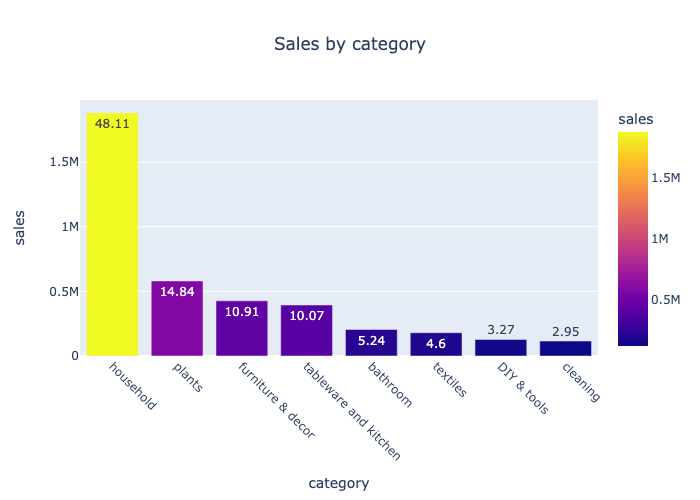

In [106]:
fig_cat_sales = px.bar(
    cat_sales, x='product_category', y='line_total',
    color='line_total',
    title='Sales by category',
    labels={'product_category': 'category', 'line_total': 'sales', 'perc': '% of total sales'},
    text='perc')
fig_cat_sales.update_layout(title_x=0.5, xaxis_tickangle=45)
fig_cat_sales.show('png')

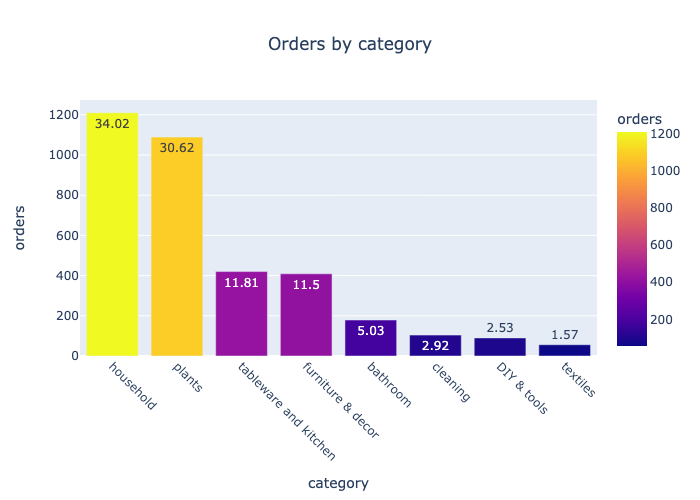

In [107]:
fig_cat_orders = px.bar(
    cat_orders, x='product_category', y='order_id',
    color='order_id',
    title='Orders by category',
    labels={'product_category': 'category', 'order_id': 'orders', 'perc': '% of total amount of orders'},
    text='perc')
fig_cat_orders.update_layout(title_x=0.5, xaxis_tickangle=45)
fig_cat_orders.show('png')

The most popular and profitable product category is the "household" category. The category "plants" also has a lot of orders (30.62%) of the total number of orders, but it is not as profitable as household goods. The goods in this category are cheaper.

The least profitable categories are "DIY & tools" and "cleaning".

## Seasonality of goods

In [75]:
seasons = df.groupby(['product_category', 'month'])['line_total'].sum().reset_index()
seasons

,product_category,month,line_total
0,DIY & tools,2018-10-01,22027.0
1,DIY & tools,2018-11-01,1675.0
2,DIY & tools,2018-12-01,11022.0
3,DIY & tools,2019-01-01,4255.0
4,DIY & tools,2019-02-01,5087.0
...,...,...,...
123,textiles,2019-09-01,15782.0
124,textiles,2019-10-01,8141.0
125,textiles,2019-11-01,7909.0
126,textiles,2019-12-01,1912.0


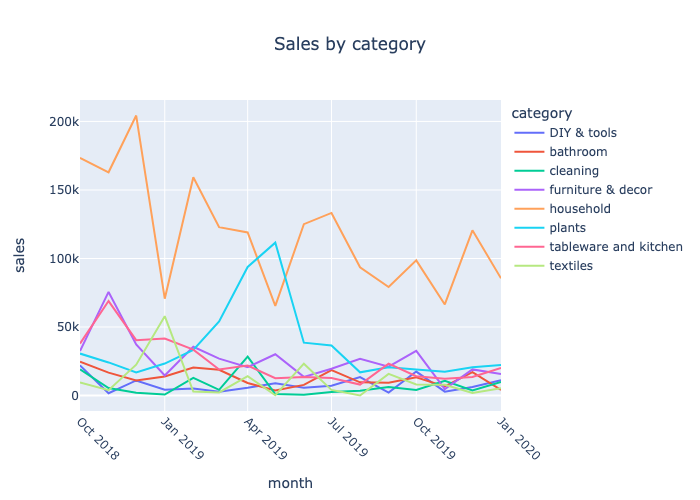

In [108]:
fig_seasons = px.line(seasons, x='month', y='line_total', color='product_category',
                      title='Sales by category',
                      labels={'product_category': 'category', 'month': 'month', 'line_total': 'sales'})
fig_seasons.update_traces(hovertemplate='Month: %{x}<br>Sales: %{y}')
fig_seasons.update_layout(title_x=0.5, xaxis_tickangle=45)
fig_seasons.show('png')

- Household Goods. The peak sales of the "Household" category is observed in December 2018, February 2019 and December 2019. The lowest sales in this category are in May.

- Plants. Throughout the year, sales in this category remain at the same level - about 20 thousand rubles. The only jump is observed in May - customers are preparing for the dacha season. In the same month the lowest sales in the category "Household goods" are observed.

- Furniture & Decor, Tableware and Kitchen - the only peak in sales in these categories is observed in November 2018, this is not repeated in November 2019

In other categories during the year, sales fluctuate from 1000 to 35 thousand rubles.

<a id=' section5'></a>
# Customer segmentation

For customer segmentation we will apply **RFM analysis** method. Where each customer is assigned points according to their behavior. The analysis is performed on the basis of the following indicators:
- r - recency - how long ago the customer made the last order
- f - frequency - how often the customer makes orders
- m - monetary value - how much money the customer spends in the store.

Let's divide customers into the following segments:

1. **Champions** are customers who have high ratings in all three metrics: Recency, Frequency and MonetaryValue (RFM). They shop very frequently and spend significant amounts on orders.

**Behavior**: Champions shop frequently, prefer quality and expensive items. They may be brand loyal and are willing to spend more to get unique offers and rewards.

**Recommendations**: Provide personalized offers, loyal rewards and sales on additional products.

2. **Loyal customers** are customers with high Frequency ratings who purchase regularly.

**Behavior**: Loyal customers are brand loyal and prefer to make repeat purchases. They may be active participants in loyalty programs and recommend products to friends.

**Recommendations**: Offer exclusive deals, loyalty rewards and recommendation bonuses.

3. **Potential Customers**: These are customers who show potential in shopping but have not yet made enough orders or are not spending as much as champions and loyal customers.

**Behavior**: Potential customers may be new customers or those who have made small orders but have not yet formed an ongoing engagement. They respond to special offers and promotions that may encourage them to make repeat purchases.

**Recommendations**: Provide targeted marketing campaigns and special offers to encourage additional purchases

4. **Lost Customers**: These are customers who have previously made purchases but have been inactive recently.

**Behavior**: Lost customers may stop making purchases for various reasons such as negative experiences or lack of attention from the company. To bring them back, you need to run active engagement campaigns, offer discounts and improve the quality of service.

**Recommendations**: Implement campaigns to win back lost customers, offer discounts and improve customer support

5. **Churn Risk**: These are customers who were previously active but are recently showing signs of decreasing activity.

**Behavior**: Churn risk can be due to competition or changes in customer needs. To retain them, you need to provide personalized promotions that may entice them to return to active purchases.

**Recommendations**: Send targeted promotions and make personalized follow-up contacts with customers

In [77]:
df = df.drop(columns=['first_two_words'])
df.head()

,date,customer_id,order_id,product,quantity,price,dom,dow,hour,month,line_total,order_total,product_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,1,0,0,2018-10-01,142.0,1037.0,plants
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,1,0,0,2018-10-01,194.0,1037.0,plants
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,1,0,0,2018-10-01,112.0,1037.0,plants
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,1,0,0,2018-10-01,179.0,1037.0,plants
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,1,0,0,2018-10-01,112.0,1037.0,plants


## Calculating metrics for RFM analysis.

In [78]:
today = df['date'].max()
df['recency'] = (today - df['date']).dt.days
rfm_metrics = df.groupby('customer_id').agg({
    'recency': 'min',
    'order_id': 'nunique',
    'line_total': 'sum'})
rfm_metrics.rename(columns={'order_id': 'frequency', 'line_total': 'monetary'}, inplace=True)
rfm_metrics = rfm_metrics.reset_index()
rfm_metrics.head()

,customer_id,recency,frequency,monetary
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,108,1,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,368,1,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,123,1,2324.0


determine the RFM score using quantiles for each metric

In [79]:
quantiles = rfm_metrics.quantile(q=[0.2, 0.4, 0.6, 0.8])

def r_score(x):
    if x <= quantiles['recency'][0.2]:
        return 5
    elif x <= quantiles['recency'][0.4]:
        return 4
    elif x <= quantiles['recency'][0.6]:
        return 3
    elif x <= quantiles['recency'][0.8]:
        return 2
    else:
        return 1
    
def fm_score(x, metric):
    if x <= quantiles[metric][0.2]:
        return 1
    if x <= quantiles[metric][0.4]:
        return 2
    if x <= quantiles[metric][0.6]:
        return 3
    if x <= quantiles[metric][0.8]:
        return 4
    else:
        return 5

rfm_metrics['r'] = rfm_metrics['recency'].apply(r_score)
rfm_metrics['f'] = rfm_metrics['frequency'].apply(fm_score, metric='frequency')
rfm_metrics['m'] = rfm_metrics['monetary'].apply(fm_score, metric='monetary')

rfm_metrics['rfm_score'] = rfm_metrics['r'].astype(str) + rfm_metrics['f'].astype(str) + \
    rfm_metrics['m'].astype(str)

rfm_metrics.head()

/var/folders/87/638lt2v12_575j1ffp582p1m0000gp/T/ipykernel_29970/475341990.py:1: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,customer_id,recency,frequency,monetary,r,f,m,rfm_score
0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,4,1,2,412
1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,2,1,2,212
2,00299f34-5385-4d13-9aea-c80b81658e1b,108,1,914.0,4,1,3,413
3,002d4d3a-4a59-406b-86ec-c3314357e498,368,1,1649.0,2,1,4,214
4,003bbd39-0000-41ff-b7f9-2ddaec152037,123,1,2324.0,4,1,5,415


определим сегменты на основе значений в колонке `rfm_score`

In [80]:
def segment_rfm(score):
    if score >= '555':
        return 'champion'
    elif score >= '444':
        return 'loyal'
    elif score >= '333':
        return 'potential'
    elif score >= '111':
        return 'lost'
    else:
        return 'churn risk'
    
rfm_metrics['segment'] = rfm_metrics['rfm_score'].apply(segment_rfm)
rfm_metrics = rfm_metrics.reset_index()
rfm_metrics.head()

,index,customer_id,recency,frequency,monetary,r,f,m,rfm_score,segment
0,0,000d6849-084e-4d9f-ac03-37174eaf60c4,107,1,555.0,4,1,2,412,potential
1,1,001cee7f-0b29-4716-b202-0042213ab038,349,1,442.0,2,1,2,212,lost
2,2,00299f34-5385-4d13-9aea-c80b81658e1b,108,1,914.0,4,1,3,413,potential
3,3,002d4d3a-4a59-406b-86ec-c3314357e498,368,1,1649.0,2,1,4,214,lost
4,4,003bbd39-0000-41ff-b7f9-2ddaec152037,123,1,2324.0,4,1,5,415,potential


## merging dataframes

Let's merge the main dataframe with the new dataframe `rfm_metrics`, add columns `rfm_score`, `segment` to `df`

In [81]:
df = df.merge(rfm_metrics[['customer_id', 'recency', 'frequency', 'monetary', 'rfm_score', 'segment']],\
              on='customer_id', how='left')
df.head()

,date,customer_id,order_id,product,quantity,price,dom,dow,hour,month,line_total,order_total,product_category,recency_x,recency_y,frequency,monetary,rfm_score,segment
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,1,0,0,2018-10-01,142.0,1037.0,plants,487,487,1,1037.0,113,lost
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,1,0,0,2018-10-01,194.0,1037.0,plants,487,487,1,1037.0,113,lost
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,1,0,0,2018-10-01,112.0,1037.0,plants,487,487,1,1037.0,113,lost
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,1,0,0,2018-10-01,179.0,1037.0,plants,487,487,1,1037.0,113,lost
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,1,0,0,2018-10-01,112.0,1037.0,plants,487,487,1,1037.0,113,lost


In [82]:
df = df.drop(columns='recency_y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5483 entries, 0 to 5482
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5483 non-null   datetime64[ns]
 1   customer_id       5483 non-null   object        
 2   order_id          5483 non-null   int64         
 3   product           5483 non-null   object        
 4   quantity          5483 non-null   int64         
 5   price             5483 non-null   float64       
 6   dom               5483 non-null   int64         
 7   dow               5483 non-null   int64         
 8   hour              5483 non-null   int64         
 9   month             5483 non-null   datetime64[ns]
 10  line_total        5483 non-null   float64       
 11  order_total       5483 non-null   float64       
 12  product_category  5483 non-null   object        
 13  recency_x         5483 non-null   int64         
 14  frequency         5483 n

## Distribution of customers by segments

Let's see how many customers belong to each segment

In [83]:
segments = df.groupby('segment')['customer_id'].nunique().reset_index()
segments

,segment,customer_id
0,lost,1391
1,loyal,625
2,potential,396


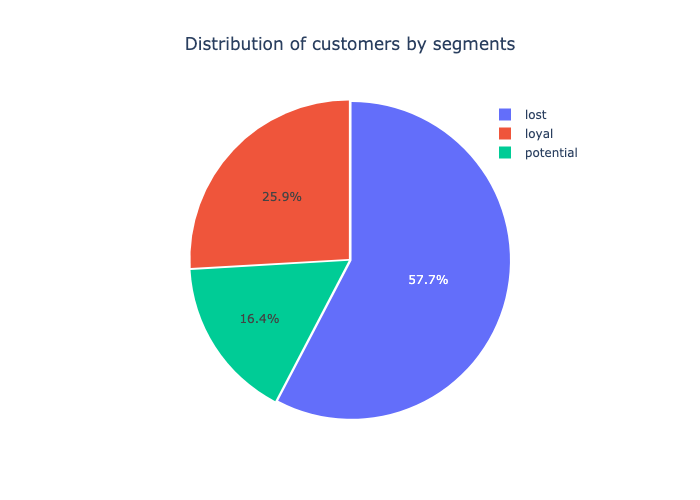

In [109]:
labels = segments['segment']
values = segments['customer_id']

fig_segm = go.Figure(data=[go.Pie(labels=labels, values=values, pull=0.01)])

fig_segm.update_layout(
    title='Distribution of customers by segments',
    title_x=0.5,
    legend=dict(
        x=0.75,
        y=1))

fig_segm.show('png')

- **Champions**. There are no top category customers left in the store who make orders regularly and for high amounts.

- **Loyal customers**. 25.9% of customers belong to the loyal segment. It is possible to develop strategies to retain them and move some of these customers to the champion segment. For example, you can send them exclusive offers, develop a loyalty reward system.

- **Potential customers**. 16.4% of customers. These are customers who have made some number of orders, but have not yet formed a permanent activity. Here it is possible to conduct targeted marketing campaigns, develop special offers

- **Lost customers**. 57.7% of clients belong to the category of lost clients. This means that they have not made orders for more than 4 months. We remember that it was in May 2019 that there was a collapse in sales, both in terms of revenue and orders. It may be possible to get some of these customers back by reminding them and running an engagement campaign.

## Loyal customers

Let's look at the categories of products purchased by customers from each segment.

In [85]:
loyal = df.query('segment == "loyal"').groupby('product_category')['order_id'].count().reset_index()
loyal = loyal.sort_values(by='order_id', ascending=False)
loyal

,product_category,order_id
4,household,473
5,plants,384
6,tableware and kitchen,136
3,furniture & decor,113
1,bathroom,68
2,cleaning,34
0,DIY & tools,33
7,textiles,19


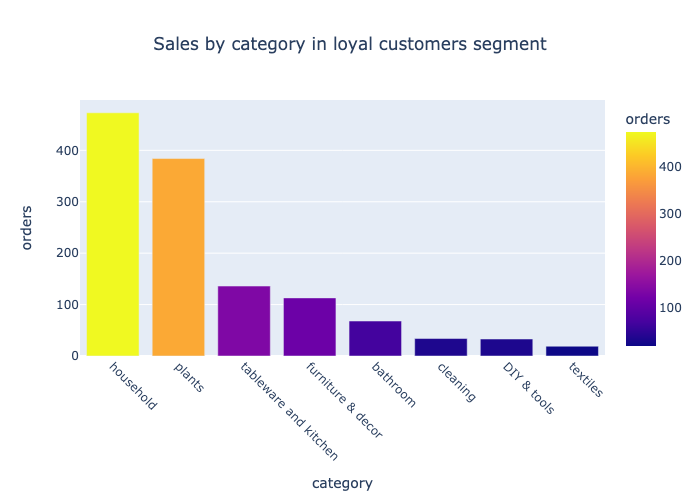

In [110]:
fig_loyal = px.bar(
    loyal, x='product_category', y='order_id',
    color='order_id',
    title='Sales by category in loyal customers segment',
    labels={'product_category': 'category', 'order_id': 'orders'})
fig_loyal.update_layout(title_x=0.5, xaxis_tickangle=45)
fig_loyal.show('png')

Loyal customers most often buy products from the "Plants" and "Household" categories.

## Potential customers

In [87]:
potential = df.query('segment == "potential"').groupby('product_category')['order_id'].count().reset_index()
potential = potential.sort_values(by='order_id', ascending=False)
potential

,product_category,order_id
5,plants,449
4,household,175
3,furniture & decor,70
6,tableware and kitchen,56
1,bathroom,29
2,cleaning,22
0,DIY & tools,16
7,textiles,11


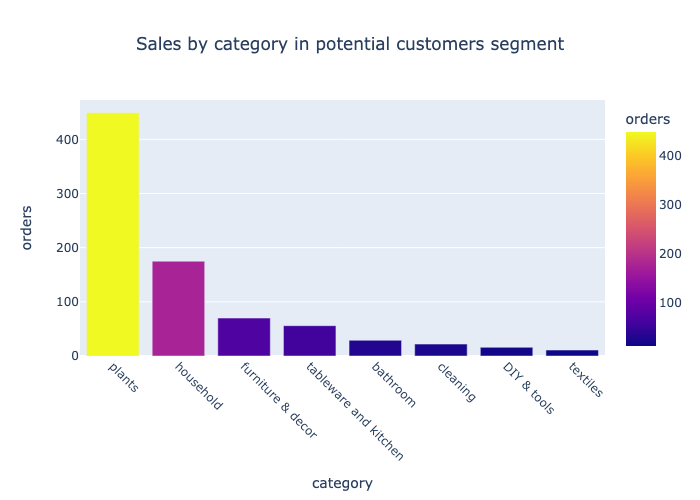

In [111]:
fig_potential = px.bar(
    potential, x='product_category', y='order_id',
    color='order_id',
    title='Sales by category in potential customers segment',
    labels={'product_category': 'category', 'order_id': 'orders'})
fig_potential.update_layout(title_x=0.5, xaxis_tickangle=45)
fig_potential.show('png')

In this segment, the category "Plants" leads with a large margin. There are 3 times more orders for goods from this category than from the "household" category.

## Lost customers

In [89]:
lost = df.query('segment == "lost"').groupby('product_category')['order_id'].count().reset_index()
lost = lost.sort_values(by='order_id', ascending=False)
lost

,product_category,order_id
5,plants,1949
4,household,619
3,furniture & decor,315
6,tableware and kitchen,289
1,bathroom,93
2,cleaning,57
0,DIY & tools,46
7,textiles,27


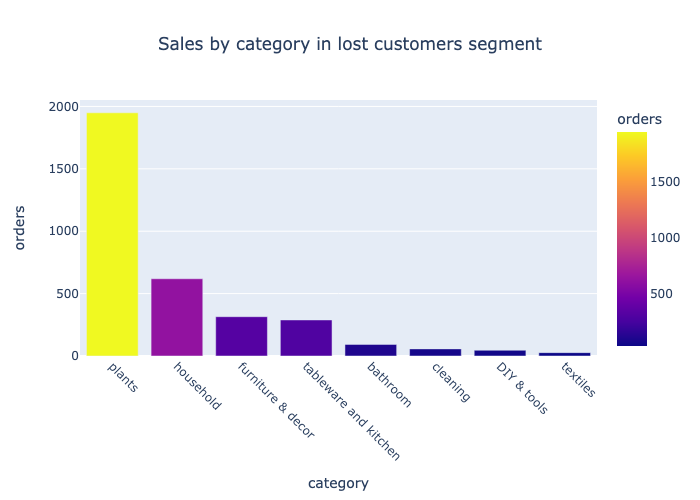

In [112]:
fig_lost = px.bar(
    lost, x='product_category', y='order_id',
    color='order_id',
    title='Sales by category in lost customers segment',
    labels={'product_category': 'category', 'order_id': 'orders'})
fig_lost.update_layout(title_x=0.5, xaxis_tickangle=45)
fig_lost.show('png')

In this segment, the most popular products are also those in the Plants category.

## Recency

Let's take a closer look at the `recency` parameter, which reflects how long ago the customer made the last order.

In [91]:
rfm_metrics['recency'].describe()

count    2412.000000
mean      215.141376
std       149.377881
min         0.000000
25%        72.000000
50%       207.500000
75%       343.000000
max       487.000000
Name: recency, dtype: float64

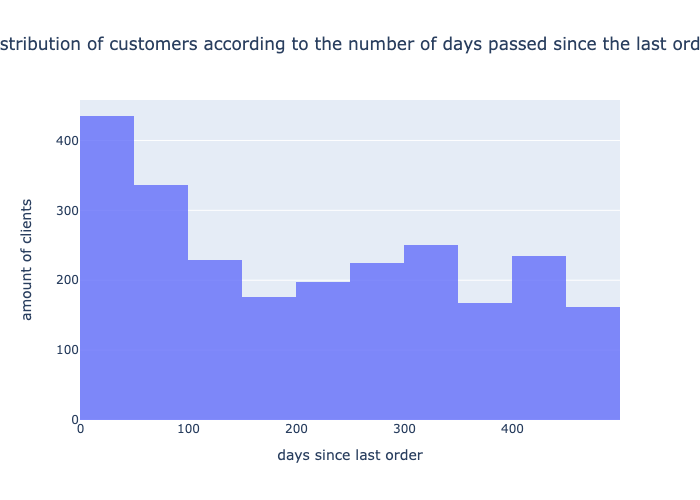

In [113]:
fig_recency = px.histogram(
    rfm_metrics, x='recency', nbins=10,
    title='Distribution of customers according to the number of days passed since the last order',
    labels={'recency': 'days since last order'},
    opacity=0.8,
#     text_auto=True
)

fig_recency.update_traces(hovertemplate='Days: %{x}<br>Clients: %{y}')
fig_recency.update_layout(title_x=0.5)
fig_recency.update_yaxes(title_text='amount of clients')

fig_recency.show('png')

Only 435 customers have ordered in the last 50 days, this represents 18% of the total number of customers.

## Frequency

Let's take a look at what happened to customers who made more than 10 orders during the period under review

In [93]:
frequent_clients = df.query('frequency > 10').sort_values(by='frequency', ascending=False)
frequent_clients['customer_id'].nunique()

3

There are only 3 such clients. Let's see which segments they belong to.

In [94]:
frequent_clients.groupby('segment')['customer_id'].nunique().reset_index()

,segment,customer_id
0,lost,2
1,loyal,1


Two of them stopped placing orders. One remained in the loyal segment.

## Files for each client group

Let's save each dataframe with segments into a separate `csv file`:
- loyal - loyal customers
- potential - potential customers
- lost - lost customers
- frequent - customers who have made more than 15 orders

In [95]:
#loyal.to_csv('loyal.csv')
#potential.to_csv('potential.csv')
#lost.to_csv('lost.csv')
#frequent_clients.to_csv('frequent.csv')

<a id=' section6'></a>
# Statistical tests

Let's make sure that the RFM analysis has correctly categorized customers into segments. Let's check if there is a statistical difference between the groups. To analyze, we use the `rfm_metrics` dataframe, where we have already aggregated the data by `customer_id`.

To test the hypotheses, we use `t-test`.

## Test 1

Let's test whether there is a difference in how long ago customers in different segments of the `monetary` criterion have placed orders.
To do this, let's take the `m` criterion and divide the customers into two groups:
- m <= 2
- m > 2

and compare the mean values of the `recency` column for these two groups.

Null hypothesis: there is no difference between the segments.

Alternative hypothesis: there are differences between segments

In [96]:
segment_1 = rfm_metrics[rfm_metrics['m'] <= 2]['recency']
segment_2 = rfm_metrics[rfm_metrics['m'] > 2]['recency']

alpha = 0.05

results = st.ttest_ind(segment_1, segment_2, equal_var=False)

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to refute the null hypothesis')

p-value 0.0015027393401705299
Reject the null hypothesis


The statistical test confirmed that there is a statistical difference between the segments in how long ago the customer last ordered.

## Test 2

The second test is for the parameter `recency` - the number of days since the last order. Let's see if there are differences in the `monetary` criterion (how much money the clent has spent in the store)

Null hypothesis: there are no differences between the segments.

Alternative hypothesis: there are differences between the segments.

In [97]:
r_1 = rfm_metrics[rfm_metrics['r'] <= 2]['monetary']
r_2 = rfm_metrics[rfm_metrics['r'] > 2]['monetary']

alpha = 0.05

results = st.ttest_ind(r_1, r_2, equal_var=False)

print('p-value', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to refute the null hypothesis')

p-value 0.44924890259342
Failed to refute the null hypothesis


There are no differences between the segments

# Overall conclusion

We have conducted a research study titled "Identifying Users Profiles"

The purpose of the study: to segment customers based on their consumption profile.

For the study, we had sales data from an online household goods store. There were 7474 rows in the original dataset.

1. In the first phase of the study, we familiarized ourselves with the data and converted the data type wherever necessary.

2. In the preprocessing phase, we found 1864 implicit duplicates that were generated when the data was uploaded - some of the orders were pro duplicated. It was decided to remove duplicates from the dataset, leaving only the original orders with the earliest date.

Next, we checked each column of the dataset for abnormal values. One row with a test order was removed. No anomalous values were found in the other columns.

After preprocessing the dataset we are left with:

- 5483 rows

- 2412 unique users

- 2327 unique items

- 3491 unique orders

We added new columns for further sales analysis.

3. Sales Analysis

**Sales**

Revenue for the entire period under review: 3'908'324

Average revenue per month: 244'270.

**Sales by month** We analyzed sales by month - revenue by month and number of orders by month.

The graph of revenue by month showed a general trend of declining sales. Starting from December 2018, the revenue went downwards.

The graph of the number of orders by month shows a slightly different trend: starting from August 2019 the number of orders started to grow and by January 2020 reached the peak, which was observed in December 2018. But the increase in the number of orders was not reflected in the revenue - obviously, customers started buying cheaper products.

**Sales by days of the month.** The most profitable are the 4th and 11th days of the month. Sales decrease towards the end of the month.

**Sales by day of the week.** The highest sales are on Tuesday. The lowest sales are on Saturday and Sunday.

**Sales by time of day.** Customers are most active at 11 o'clock in the afternoon. Orders are lowest at 3 am.

Order amount.

- Minimum order amount: 9 rubles
- Maximum order amount: 49432 rubles
- Median order amount: 577 rubles.

There are isolated cases when the order amount exceeds 30000. A few orders with the amount from 10 to 30 thousand rubles. The bulk of orders are made for the amount from 9 to 5000 rubles.

**Revenues per customer.** There is one customer who spent more than 150 thousand rubles in the store. There are several customers who made purchases for the amount from 20 to 57 thousand rubles. Most customers spent between 15 rubles and 10000 rubles. Median revenue per customer is 831 rubles.

4. We analyzed the products and categorized them into the following categories:

- plants

- tableware and kitchen

- bathroom

- home & decor

- househol

- cleaning

- textiles

- DIY & tools

After analyzing sales by category, we found out that the most profitable categories are "household goods" and "plants".

- Household goods - this category accounts for 48% of total store sales. 34% of all orders were made for products in this category.

- plants - 14% of total sales; 30% of all orders.

The least profitable categories are "construction and repair", "cleaning".

**Seasonality of goods.

- "Household goods". The peak sales of goods in the "household goods" category are observed in December 2018, February 2019 and December 2019. The lowest sales in this category are in May.

- Plants. Throughout the year, sales in this category remain at the same level - about 20 thousand rubles. The only jump is observed in May - customers are preparing for the dacha season. In the same month the lowest sales in the category "Household goods" are observed.

- "Decor and interior", "Ware and kitchen" - the only jump in sales in these categories is observed in November 2018, this jump is not repeated in November 2019

In other categories during the year, sales fluctuate from 1000 to 35 thousand rubles.

5. Customer segmentation. The rfm analysis method was chosen for customer segmentation.

We categorized the customers into the following segments:

- Champions are customers who have high rankings in all three metrics: Recency, Frequency and Monetary Value (RFM). They shop very frequently and spend significant amounts on orders.

- Loyal customers are customers with a high rating on Frequency who make purchases regularly.

- Potential customers are customers who show potential in purchases, but have not yet made enough orders or are not spending as much as champions and loyal customers.

- Lost customers are customers who have previously made purchases but have not been active recently.

- Churn risk are customers who were previously active but recently show signs of decreasing activity.

After categorizing the customers into segments, we found that.
- **Champions**. There are no top category customers left in the store who place orders regularly and for high amounts.

- **Loyal customers**. 25.9% of customers belong to the loyal segment. It is possible to develop strategies to retain them and move some of these customers to the champion segment. For example, you can send them exclusive offers, develop a loyalty reward system.

- **Potential customers**. 16.4% of customers. These are customers who have made some number of orders, but have not yet formed a permanent activity. Here it is possible to conduct targeted marketing campaigns, develop special offers

- **Lost customers**. 57.7% of clients belong to the category of lost clients. This means that they have not made orders for more than 4 months. We remember that it was in May 2019 that there was a collapse in sales, both in terms of revenue and orders. It may be possible to get some of these customers back by reminding them and conducting an engagement campaign.

We have checked which products of which categories are preferred by loyal and potential customers. In both segments the products of their category "plants" are leading, and "household goods" is in the second place.

We checked how many customers have made orders during the last 50 days - 435 customers.

We analyzed which segments the customers who made more than 10 orders belong to. There are only 3 such customers. Two of them are in the "lost" segment, 1 is loyal.

6. Statistical tests

We performed 2 statistical tests to ensure that customers were correctly segmented during rfm analysis.

**Test 1**.

Purpose: to test whether there is a difference in how long customers in different segments of the monetary criterion have been ordering for.

The null hypothesis was not confirmed. The statistical test confirmed that there is a statistical difference in the average check between segments.

**Test 2**

Purpose: to test whether there are differences in the criterion monetary (how much money the clent spent in the store) for different segments of the `recency' criterion 

It was not possible to disprove the null theory. Statistical test showed that there are no differences between the segments.

Let's unload the dataset cleaned from duplicates and anomalies, which we will use to build the dashboard

In [98]:
# df.to_csv('ecom_cleaned.csv')